# 1) Télécharger les données fournies

In [1]:
from google.colab import drive  # Importation du module permettant de monter Google Drive
drive.mount('/content/drive')   # Montage de Google Drive dans le répertoire '/content/drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os        # Module permettant d'interagir avec le système de fichiers (gestion des chemins, création de dossiers, etc.)
import numpy as np  # Bibliothèque pour les calculs numériques et la manipulation des tableaux (utile pour le traitement des images et des labels)
import tensorflow as tf  # Importation de TensorFlow, qui sera utilisé pour construire et entraîner le modèle CNN


# 2) Charger les données à l'aide de Python

In [3]:
import zipfile  # Module permettant de manipuler des fichiers ZIP

# Définition du chemin du fichier ZIP et du dossier d'extraction
zip_path = "/content/drive/MyDrive/malaria_hematie_dataset.zip"  # Chemin de l'archive ZIP contenant le dataset
extract_path = "/content/data/"  # Répertoire où les fichiers seront extraits

# Vérifier si le dossier d'extraction existe déjà pour éviter une ré-extraction inutile
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:  # Ouverture du fichier ZIP en mode lecture
        zip_ref.extractall(extract_path)  # Extraction du contenu dans le dossier spécifié
    print("Fichier ZIP extrait avec succès !")  # Message de confirmation

# Définition des chemins des dossiers contenant les images classées
base_path = "/content/data/malaria_hematie_dataset"  # Répertoire principal contenant les images
infected_path = os.path.join(base_path, "parasitized")  # Chemin des images de globules rouges infectés
healthy_path = os.path.join(base_path, "uninfected")  # Chemin des images de globules rouges sains

base_path: /content/data/malaria_hematie_dataset
infected_path: /content/data/malaria_hematie_dataset/parasitized
healthy_path: /content/data/malaria_hematie_dataset/uninfected
Number of rows in DataFrame: 27558
                                          image_path  label
0  /content/data/malaria_hematie_dataset/parasiti...      0
1  /content/data/malaria_hematie_dataset/parasiti...      0
2  /content/data/malaria_hematie_dataset/parasiti...      0
3  /content/data/malaria_hematie_dataset/parasiti...      0
4  /content/data/malaria_hematie_dataset/parasiti...      0


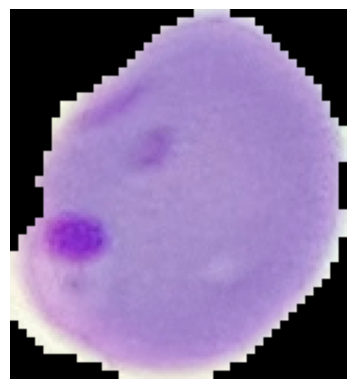

In [4]:
import os  # Module pour gérer les fichiers et les chemins
import glob  # Permet de rechercher des fichiers correspondant à un certain motif
import pandas as pd  # Bibliothèque pour manipuler des données sous forme de tableaux
from PIL import Image  # Module pour ouvrir et manipuler des images
import matplotlib.pyplot as plt  # Bibliothèque pour afficher des graphiques et des images

# Vérification des chemins définis précédemment
print(f"base_path: {base_path}")  # Vérifier que le chemin de base est correct
infected_path = os.path.join(base_path, "parasitized")  # Chemin des images infectées
healthy_path = os.path.join(base_path, "uninfected")  # Chemin des images saines

# Vérification des chemins des dossiers contenant les images
print(f"infected_path: {infected_path}")
print(f"healthy_path: {healthy_path}")

# Liste pour stocker les chemins des images et leurs labels correspondants
data = []

# Utilisation de glob pour récupérer tous les fichiers image dans les dossiers spécifiés
# On considère que les images sont au format PNG (modifier l'extension si nécessaire)

for img_path in glob.glob(os.path.join(infected_path, "*.png")):
    data.append((img_path, 0))  # Label 0 pour les images infectées

for img_path in glob.glob(os.path.join(healthy_path, "*.png")):
    data.append((img_path, 1))  # Label 1 pour les images saines

# Conversion en DataFrame Pandas pour une manipulation plus facile des données
df = pd.DataFrame(data, columns=["image_path", "label"])

# Affichage du nombre total d'images récupérées
print(f"Number of rows in DataFrame: {len(df)}")

# Vérification que le DataFrame contient bien des données avant d'afficher des exemples
if not df.empty:
    # Afficher les 5 premières lignes du DataFrame
    print(df.head())

    # Vérification d'une image en l'ouvrant et en l'affichant
    img = Image.open(df.iloc[0, 0])  # Ouverture de la première image du DataFrame
    plt.imshow(img)  # Affichage de l'image
    plt.axis("off")  # Suppression des axes pour une meilleure visibilité
    plt.show()
else:
    print("DataFrame is empty. Please check the image paths and ensure images are present.")

# 3) Prétraitement des images

Pour le modèle from_scratch

In [5]:
import numpy as np  # Bibliothèque pour manipuler les tableaux numériques
from PIL import Image  # Module permettant de charger et manipuler des images

# Initialisation des listes pour stocker les images et les labels
data = []

# Définition de la taille des images
image_size = (64, 64)  # Taille cible des images après redimensionnement

# Chargement des images et normalisation
for img_path, label in zip(df['image_path'], df['label']):
    # Charger l'image avec PIL
    img = Image.open(img_path)

    # Redimensionner l'image à la taille spécifiée
    img = img.resize(image_size)

    # Convertir l'image en tableau NumPy
    img_array = np.array(img)

    # Normaliser l'image (mettre les valeurs des pixels entre 0 et 1)
    img_array = img_array / 255.0

    # Ajouter l'image normalisée et son label dans la liste
    data.append((img_array, label))

# Séparer les images et les labels en tableaux NumPy
images_scratch = np.array([item[0] for item in data])  # Extraction des images
labels_scracth = np.array([item[1] for item in data])  # Extraction des labels

# Vérification des formes des tableaux obtenus
print(f"Images shape: {images_scratch.shape}")
print(f"Labels shape: {labels_scracth.shape}")

Images shape: (27558, 64, 64, 3)
Labels shape: (27558,)


Pour le VGG16

In [5]:
import numpy as np  # Bibliothèque pour manipuler les tableaux numériques
from PIL import Image  # Module permettant de charger et manipuler des images

# Initialisation des listes pour stocker les images et les labels
data = []

# Définition de la taille des images
image_size = (64, 64)  # Taille cible des images après redimensionnement

# Chargement des images sans normalisation
for img_path, label in zip(df['image_path'], df['label']):
    # Charger l'image avec PIL
    img = Image.open(img_path)

    # Redimensionner l'image à la taille spécifiée
    img = img.resize(image_size)

    # Convertir l'image en tableau NumPy
    img_array = np.array(img)

    # Ajouter l'image et son label dans la liste
    data.append((img_array, label))

# Séparer les images et les labels en tableaux NumPy
images_VGG16 = np.array([item[0] for item in data])  # Extraction des images
labels_VGG16 = np.array([item[1] for item in data])  # Extraction des labels

# Vérification des formes des tableaux obtenus
print(f"Images shape: {images_VGG16.shape}")
print(f"Labels shape: {labels_VGG16.shape}")

Images shape: (27558, 64, 64, 3)
Labels shape: (27558,)


Pour le ResNet50

In [5]:
import numpy as np  # Bibliothèque pour manipuler les tableaux numériques
from PIL import Image  # Module permettant de charger et manipuler des images

# Initialisation des listes pour stocker les images et les labels
data = []

# Définition de la taille des images
image_size = (64, 64)  # Taille cible des images après redimensionnement

# Chargement des images sans normalisation
for img_path, label in zip(df['image_path'], df['label']):
    # Charger l'image avec PIL
    img = Image.open(img_path)

    # Redimensionner l'image à la taille spécifiée
    img = img.resize(image_size)

    # Convertir l'image en tableau NumPy
    img_array = np.array(img)

    # Ajouter l'image et son label dans la liste
    data.append((img_array, label))

# Séparer les images et les labels en tableaux NumPy
images_ResNet50 = np.array([item[0] for item in data])  # Extraction des images
labels_ResNet50 = np.array([item[1] for item in data])  # Extraction des labels

# Vérification des formes des tableaux obtenus
print(f"Images shape: {images_ResNet50.shape}")
print(f"Labels shape: {labels_ResNet50.shape}")

Images shape: (27558, 64, 64, 3)
Labels shape: (27558,)


# 4) Encoder les labels


In [ ]:
import numpy as np

# Vérifier les valeurs uniques dans labels car l'encodage à déjà été réalisé
print("Valeurs uniques des labels :", np.unique(labels_scracth))

Valeurs uniques des labels : [0 1]


# 5) Faire de la data augmentation

Split pour le modèle from_scratch

In [6]:
# Split des données en train / validation / test
from sklearn.model_selection import train_test_split

# Étape 1 : Séparer Train (70%) et Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    images_scratch, labels_scracth, test_size=0.3, random_state=42, stratify=labels_scracth
)

# Étape 2 : Séparer Validation (15%) et Test (15%) à partir de Temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Afficher les tailles des ensembles
print(f"Train : {X_train.shape}, {y_train.shape}")
print(f"Validation : {X_val.shape}, {y_val.shape}")
print(f"Test : {X_test.shape}, {y_test.shape}")


Train : (19290, 64, 64, 3), (19290,)
Validation : (4134, 64, 64, 3), (4134,)
Test : (4134, 64, 64, 3), (4134,)


Split pour le VGG16

In [6]:
# Split des données en train / validation / test
from sklearn.model_selection import train_test_split

# Étape 1 : Séparer Train (70%) et Temp (30%)
X_train_VGG16, X_temp_VGG16, y_train_VGG16, y_temp_VGG16 = train_test_split(
    images_VGG16, labels_VGG16, test_size=0.3, random_state=42, stratify=labels_VGG16
)

# Étape 2 : Séparer Validation (15%) et Test (15%) à partir de Temp
X_val_VGG16, X_test_VGG16, y_val_VGG16, y_test_VGG16 = train_test_split(
    X_temp_VGG16, y_temp_VGG16, test_size=0.5, random_state=42, stratify=y_temp_VGG16
)

# Afficher les tailles des ensembles
print(f"Train : {X_train_VGG16.shape}, {y_train_VGG16.shape}")
print(f"Validation : {X_val_VGG16.shape}, {y_val_VGG16.shape}")
print(f"Test : {X_test_VGG16.shape}, {y_test_VGG16.shape}")


Train : (19290, 64, 64, 3), (19290,)
Validation : (4134, 64, 64, 3), (4134,)
Test : (4134, 64, 64, 3), (4134,)


Split pour le ResNet50

In [6]:
# Split des données en train / validation / test
from sklearn.model_selection import train_test_split

# Étape 1 : Séparer Train (70%) et Temp (30%)
X_train_ResNet50, X_temp_ResNet50, y_train_ResNet50, y_temp_ResNet50 = train_test_split(
    images_ResNet50, labels_ResNet50, test_size=0.3, random_state=42, stratify=labels_ResNet50
)

# Étape 2 : Séparer Validation (15%) et Test (15%) à partir de Temp
X_val_ResNet50, X_test_ResNet50, y_val_ResNet50, y_test_ResNet50 = train_test_split(
    X_temp_ResNet50, y_temp_ResNet50, test_size=0.5, random_state=42, stratify=y_temp_ResNet50
)

# Afficher les tailles des ensembles
print(f"Train : {X_train_ResNet50.shape}, {y_train_ResNet50.shape}")
print(f"Validation : {X_val_ResNet50.shape}, {y_val_ResNet50.shape}")
print(f"Test : {X_test_ResNet50.shape}, {y_test_ResNet50.shape}")


Train : (19290, 64, 64, 3), (19290,)
Validation : (4134, 64, 64, 3), (4134,)
Test : (4134, 64, 64, 3), (4134,)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rotation_range=20,         # Rotation aléatoire jusqu'à 20°
    width_shift_range=0.1,     # Décalage horizontal (10% de l'image)
    height_shift_range=0.1,    # Décalage vertical (10% de l'image)
    zoom_range=0.15,          # Zoom aléatoire jusqu'à 15%
    horizontal_flip=True,      # Miroir horizontal
    fill_mode='nearest'        # Remplissage des pixels manquants
)

#  Générateur pour l'ensemble de validation (Pas d'augmentation ici)
val_datagen = ImageDataGenerator()

# Générateur pour l'ensemble de test (Pas d'augmentation non plus)
test_datagen = ImageDataGenerator()

# Générer les images en batch
train_generator_scratch = train_datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
val_generator_scratch = val_datagen.flow(X_val, y_val, batch_size=32, shuffle=False)
test_generator_scratch = test_datagen.flow(X_test, y_test, batch_size=32, shuffle=False)


# 6) Afficher les images augmentées

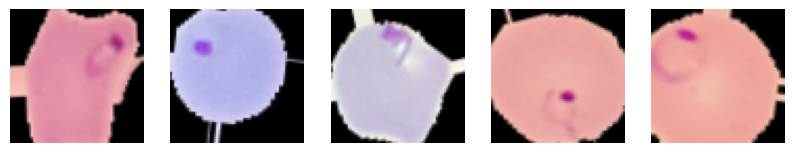

In [8]:
# Vérification : Afficher quelques images augmentées
import matplotlib.pyplot as plt

# Extraire un batch d'images augmentées
images_aug, labels_aug = next(train_generator_scratch)

# Afficher 5 images transformées
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images_aug[i])
    plt.axis("off")
plt.show()

# II) Entraînement de 3 Modèles

## 1) Implémentation de 2 Callbacks

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Définir les callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Liste des callbacks
callbacks = [early_stopping, reduce_lr]

# Affichage pour confirmation
print("Callbacks définis :", callbacks)

Callbacks définis : [<keras.src.callbacks.early_stopping.EarlyStopping object at 0x79aba653f6d0>, <keras.src.callbacks.reduce_lr_on_plateau.ReduceLROnPlateau object at 0x79aba6651210>]


## 2 et 3) Implémentation et entraînement de 3 CNN

### Modèle from scratch avec Sequential

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Dimensions des images
input_shape = (64, 64, 3)

# Nombre de classes
num_classes = 1  # Pour problème binaire

# Charger et construire le modèle à l'intérieur de la stratégie TPU

  # Définition du modèle CNN

model_from_scratch = Sequential([
    # Première couche de convolution
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    # Deuxième couche de convolution
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Régularisation

    # Couche Flatten
    Flatten(),

    # Couche dense
    Dense(128, activation='relu'),

    # Couche de sortie
    Dense(num_classes, activation='sigmoid')  # Sigmoid pour problème binaire
])

# Résumé du modèle
model_from_scratch.summary()

# Compilation du modèle
model_from_scratch.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

print("Modèle CNN défini et compilé.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Modèle CNN défini et compilé.


In [11]:
# Entraîner le modèle
history = model_from_scratch.fit(
    train_generator_scratch,  # Générateur d'images d'entraînement avec augmentation
    epochs=15,  # Nombre d'époques à entraîner
    validation_data=val_generator_scratch,  # Générateur d'images de validation
    callbacks=callbacks  # Appel des callbacks (EarlyStopping, ReduceLROnPlateau)
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


603/603 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.5918 - loss: 0.6454 - val_accuracy: 0.8861 - val_loss: 0.3142 - learning_rate: 0.0010
Epoch 2/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.8906 - loss: 0.2911 - val_accuracy: 0.9328 - val_loss: 0.1881 - learning_rate: 0.0010
Epoch 3/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.9115 - loss: 0.2396 - val_accuracy: 0.9296 - val_loss: 0.1878 - learning_rate: 0.0010
Epoch 4/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.9096 - loss: 0.2317 - val_accuracy: 0.9456 - val_loss: 0.1588 - learning_rate: 0.0010
Epoch 5/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.9270 - loss: 0.2017 - val_accuracy: 0.9531 - val_loss: 0.1465 - learning_rate: 0.0010
Epoch 6/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.9331 - loss: 0.1952 - val_accuracy: 0.9552 - val_loss: 0.1499 - learning_rate: 0.0010
Epoch 7/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.9344 - loss: 0.1988

### Fine-tuning du VGG16 pré-entraîné sur ImageNet



In [8]:
import tensorflow as tf  # Bibliothèque pour construire et entraîner des modèles de deep learning
from tensorflow.keras.applications import VGG16  # Importation du modèle VGG16 pré-entraîné
from tensorflow.keras.models import Model  # Permet de créer un modèle personnalisé
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization  # Couches supplémentaires
from tensorflow.keras.applications.vgg16 import preprocess_input  # Fonction de prétraitement spécifique à VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Génération d'images pour l'augmentation des données
from tensorflow.keras.optimizers import Adam  # Optimiseur Adam pour l'entraînement

# Charger VGG16 pré-entraîné (sans la tête fully-connected)
base_model_VGG16 = VGG16(
    weights='imagenet',  # Poids pré-entraînés sur ImageNet
    include_top=False,  # Exclure la partie fully-connected pour ajouter un classificateur personnalisé
    input_shape=(64, 64, 3)  # Définir la taille d’entrée adaptée aux images du dataset
)

# Geler les poids du modèle de base pour ne pas l’entraîner lors de la première phase
base_model_VGG16.trainable = False

# Ajouter de nouvelles couches au-dessus de VGG16
x = base_model_VGG16.output  # Récupération de la sortie du modèle de base
x = GlobalAveragePooling2D()(x)  # Permet de réduire la dimensionnalité des features extraits
x = Dense(512, activation='relu')(x)  # Première couche fully-connected avec 512 neurones
x = Dense(256, activation='relu')(x)  # Deuxième couche fully-connected avec 256 neurones
output = Dense(1, activation='sigmoid')(x)  # Couche de sortie pour classification binaire

# Création du modèle final
model_vgg16 = Model(inputs=base_model_VGG16.input, outputs=output)

# Compilation du modèle
model_vgg16.compile(
    optimizer=Adam(learning_rate=1e-3),  # Optimiseur Adam avec un learning rate initial de 0.001
    loss='binary_crossentropy',  # Fonction de perte pour classification binaire
    metrics=['accuracy']  # Mesure principale d’évaluation : l’exactitude (accuracy)
)

# Affichage du résumé du modèle pour visualiser l’architecture
model_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,6

 Total params: 15,108,929 (57.64 MB)

 Trainable params: 394,241 (1.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
# Prétraitement des images avec la normalisation ImageNet
train_datagen_vgg = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.8,1.2],
    shear_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)
# Pour la validation, seul le prétraitement ImageNet est appliqué
val_datagen_vgg = ImageDataGenerator(preprocessing_function=preprocess_input)

# Supposons que X_train, y_train, X_val, y_val sont déjà définis
train_generator_vgg = train_datagen_vgg.flow(
    X_train_VGG16, y_train_VGG16,
    batch_size=32,
    shuffle=True
)
val_generator_vgg = val_datagen_vgg.flow(
    X_val_VGG16, y_val_VGG16,
    batch_size=32,
    shuffle=False
)

In [10]:
# Phase 1 : Entraînement initial (base_model gelé)
history_vgg16 = model_vgg16.fit(
    train_generator_vgg,
    validation_data=val_generator_vgg,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)
# Phase 2 : Fine-tuning (dégeler les dernières couches de base_model)
base_model_VGG16.trainable = True
for layer in base_model_VGG16.layers[:-6]:  # Dégeler uniquement les dernières couches
    layer.trainable = False

# Réduire le learning rate pour le fine-tuning
model_vgg16.compile(optimizer=Adam(learning_rate=1e-4),  # Taux plus faible
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Ré-entraînement
history_finetune = model_vgg16.fit(
    train_generator_vgg,
    validation_data=val_generator_vgg,
    epochs=10,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 58s 86ms/step - accuracy: 0.8059 - loss: 0.7513 - val_accuracy: 0.8972 - val_loss: 0.2700 - learning_rate: 0.0010
Epoch 2/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 46s 77ms/step - accuracy: 0.8608 - loss: 0.3489 - val_accuracy: 0.8800 - val_loss: 0.2960 - learning_rate: 0.0010
Epoch 3/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.8772 - loss: 0.3088 - val_accuracy: 0.9054 - val_loss: 0.2517 - learning_rate: 0.0010
Epoch 4/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.8720 - loss: 0.3152 - val_accuracy: 0.8761 - val_loss: 0.3143 - learning_rate: 0.0010
Epoch 5/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 48s 80ms/step - accuracy: 0.8789 - loss: 0.3038 - val_accuracy: 0.9117 - val_loss: 0.2489 - learning_rate: 0.0010
Epoch 6/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 54s 89ms/step - accuracy: 0.8786 - loss: 0.2957 - val_accuracy: 0.9173 - val_loss: 0.2264 - learning_rate: 0.0010
Epoch 7/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 47s 79ms/step - accuracy: 0.8758 - l

### Fine-tuning du ResNet50 pré-entraîné sur ImageNet

In [8]:
import tensorflow as tf  # Importation de TensorFlow pour le deep learning
from tensorflow.keras.applications import ResNet50  # Importation du modèle pré-entraîné ResNet50
from tensorflow.keras.models import Model  # Permet de créer un modèle personnalisé
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization  # Couches supplémentaires
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Générateur d'images pour l'augmentation des données
from tensorflow.keras.optimizers import Adam  # Optimiseur Adam pour l'entraînement

# Définition de la fonction de prétraitement spécifique à ResNet50
resnet_preprocess = tf.keras.applications.resnet50.preprocess_input

# Charger ResNet50 pré-entraîné (sans la tête fully-connected)
base_model_ResNet50 = ResNet50(
    weights='imagenet',  # Chargement des poids pré-entraînés sur ImageNet
    include_top=False,  # Exclure les couches fully-connected d'origine pour en ajouter de nouvelles
    input_shape=(64, 64, 3)  # Définition de la taille d'entrée des images (64x64 pixels, 3 canaux couleur)
)

# Geler les poids du modèle de base pour éviter de l'entraîner dans un premier temps
base_model_ResNet50.trainable = False

# Ajouter des couches fully-connected pour l'adaptation à notre tâche
x = base_model_ResNet50.output  # Récupération de la sortie du modèle de base
x = GlobalAveragePooling2D()(x)  # Réduction de la dimensionnalité des features maps
x = Dense(512, activation='relu')(x)  # Couche dense avec 512 neurones et activation ReLU
x = Dense(256, activation='relu')(x)  # Couche dense avec 256 neurones et activation ReLU
output = Dense(1, activation='sigmoid')(x)  # Couche de sortie avec activation sigmoïde pour la classification binaire

# Création du modèle final avec ResNet50 comme base
model_resnet = Model(inputs=base_model_ResNet50.input, outputs=output)

# Compilation du modèle avec l'optimiseur Adam et la fonction de perte adaptée à une classification binaire
model_resnet.compile(
    optimizer=Adam(learning_rate=1e-3),  # Optimiseur Adam avec un learning rate de 0.001
    loss='binary_crossentropy',  # Fonction de perte adaptée aux problèmes de classification binaire
    metrics=['accuracy']  # Utilisation de l'accuracy comme métrique d'évaluation
)

# Affichage du résumé du modèle pour voir son architecture
model_resnet.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 64, 64, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 70, 70, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 32, 32, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 32, 32, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 32, 32, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 34, 34, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 16, 16, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 16, 16, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 16, 16, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 16, 16, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 16, 16, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,768,385 (94.48 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
# Prétraitement des images avec la normalisation ImageNet
train_datagen_resnet = ImageDataGenerator(
    preprocessing_function=resnet_preprocess,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)
val_datagen_resnet = ImageDataGenerator(preprocessing_function=resnet_preprocess)

# Générateurs pour l'entraînement et la validation
train_generator_resnet = train_datagen_resnet.flow(X_train_ResNet50, y_train_ResNet50, batch_size=32 , shuffle=True)
val_generator_resnet = val_datagen_resnet.flow(X_val_ResNet50, y_val_ResNet50, batch_size=32 , shuffle=False)

In [10]:
# Phase 1 : Entraîner le modèle
history_resnet = model_resnet.fit(
    train_generator_resnet,
    validation_data=val_generator_resnet,
    epochs=50,
    callbacks=callbacks
)

# Phase 2 : Fine-tuning (dégeler les dernières couches de base_model)
base_model_ResNet50.trainable = True
for layer in base_model_ResNet50.layers[:-6]:  # Dégeler uniquement les dernières couches
    layer.trainable = False

model_resnet.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_resnet_ft = model_resnet.fit(
    train_generator_resnet,
    validation_data=val_generator_resnet,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


603/603 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.8015 - loss: 0.5670 - val_accuracy: 0.8887 - val_loss: 0.2728 - learning_rate: 0.0010
Epoch 2/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 37s 61ms/step - accuracy: 0.8640 - loss: 0.3190 - val_accuracy: 0.8633 - val_loss: 0.3206 - learning_rate: 0.0010
Epoch 3/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.8688 - loss: 0.3126 - val_accuracy: 0.8195 - val_loss: 0.3872 - learning_rate: 0.0010
Epoch 4/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.8748 - loss: 0.2982 - val_accuracy: 0.8237 - val_loss: 0.4094 - learning_rate: 0.0010
Epoch 5/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.8830 - loss: 0.2854 - val_accuracy: 0.8924 - val_loss: 0.2498 - learning_rate: 0.0010
Epoch 6/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.8783 - loss: 0.2910 - val_accuracy: 0.8962 - val_loss: 0.2595 - learning_rate: 0.0010
Epoch 7/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.8852 - loss: 0.2796

## 4) Sauvegarder les poids des 3 différents modèles

In [11]:
# Sauvegarder les poids du modèle ResNet50
model_resnet.save_weights("model_ResNet50.weights.h5")

In [11]:
# Sauvegarder les poids du modèle VGG16
model_vgg16.save_weights("model_VGG16.weights.h5")

In [12]:
# Sauvegarder les poids du modèle créé from scratch
model_from_scratch.save_weights("model_from_scratch.weights.h5")

# III) Test des Modèles

## 1) Afficher le graphique ROC et calculer l’AUC de chacun des 3 modèles.

From_scratch

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


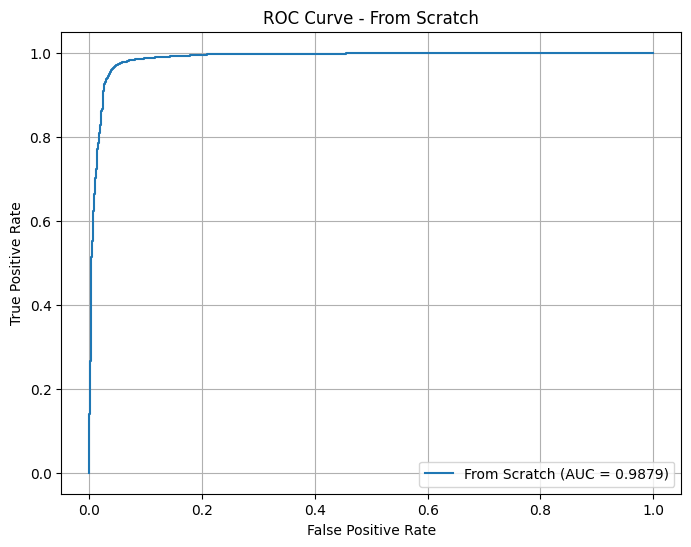

AUC Scratch : 0.9879


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prédiction des probabilités du modèle from scratch
y_probs_scratch = model_from_scratch.predict(X_test)

# Calcul de la courbe ROC et de l'AUC
fpr_scratch, tpr_scratch, _ = roc_curve(y_test, y_probs_scratch)
auc_scratch = auc(fpr_scratch, tpr_scratch)

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_scratch, tpr_scratch, label=f"From Scratch (AUC = {auc_scratch:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - From Scratch")
plt.legend()
plt.grid()
plt.show()

# Affichage de l'AUC
print(f"AUC Scratch : {auc_scratch:.4f}")

VGG16

130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


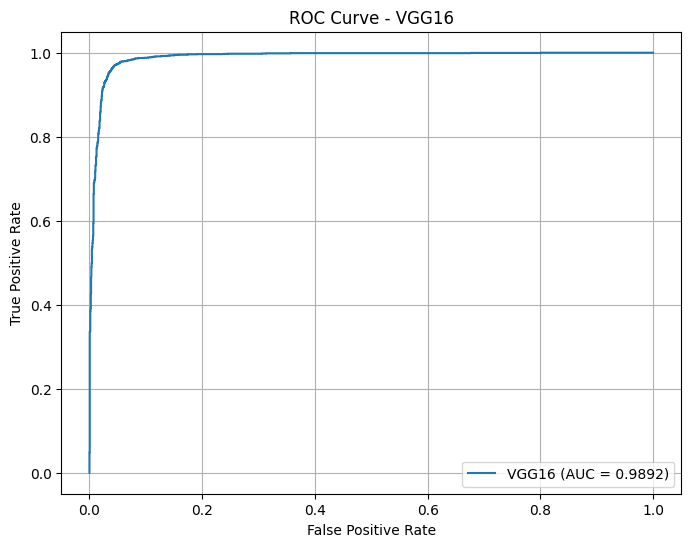

AUC VGG16 : 0.9892


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prédiction des probabilités du modèle VGG16
y_probs_vgg16 = model_vgg16.predict(X_test_VGG16)

# Calcul de la courbe ROC et de l'AUC
fpr_vgg16, tpr_vgg16, _ = roc_curve(y_test_VGG16, y_probs_vgg16)
auc_vgg16 = auc(fpr_vgg16, tpr_vgg16)

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_vgg16, tpr_vgg16, label=f"VGG16 (AUC = {auc_vgg16:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - VGG16")
plt.legend()
plt.grid()
plt.show()

# Affichage de l'AUC
print(f"AUC VGG16 : {auc_vgg16:.4f}")

ResNet50

130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


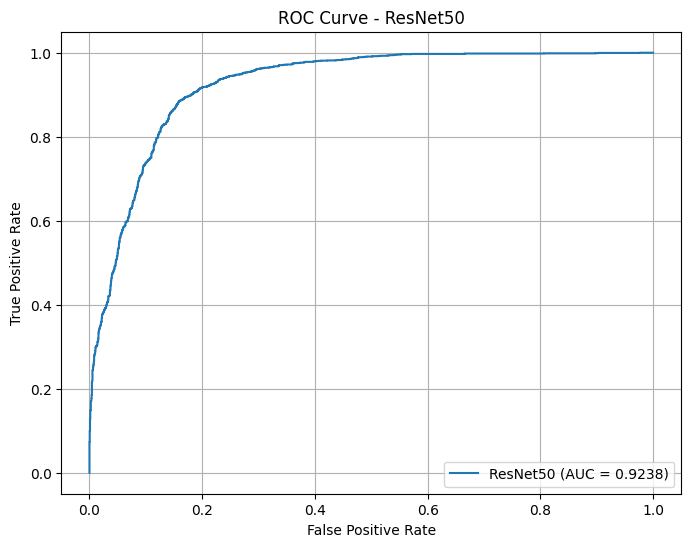

AUC ResNet50 : 0.9238


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prédiction des probabilités du modèle ResNet50
y_probs_resnet50 = model_resnet.predict(X_test_ResNet50)

# Calcul de la courbe ROC et de l'AUC
fpr_resnet50, tpr_resnet50, _ = roc_curve(y_test_ResNet50, y_probs_resnet50)
auc_resnet50 = auc(fpr_resnet50, tpr_resnet50)

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_resnet50, tpr_resnet50, label=f"ResNet50 (AUC = {auc_resnet50:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ResNet50")
plt.legend()
plt.grid()
plt.show()

# Affichage de l'AUC
print(f"AUC ResNet50 : {auc_resnet50:.4f}")

## 2) Calculer la Matrice de Confusion

From_scratch

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


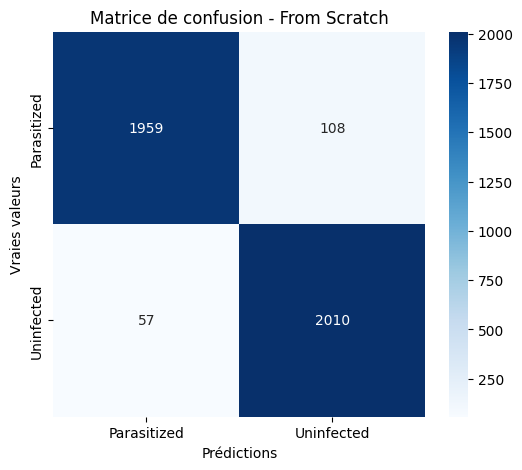

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions du modèle From Scratch sur le jeu de test
y_pred_scratch = (model_from_scratch.predict(X_test) > 0.5).astype("int32")

# Calcul de la matrice de confusion
cm_scratch = confusion_matrix(y_test, y_pred_scratch)

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(cm_scratch, annot=True, fmt="d", cmap="Blues", xticklabels=["Parasitized", "Uninfected"], yticklabels=["Parasitized", "Uninfected"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion - From Scratch")
plt.show()

VGG16

130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


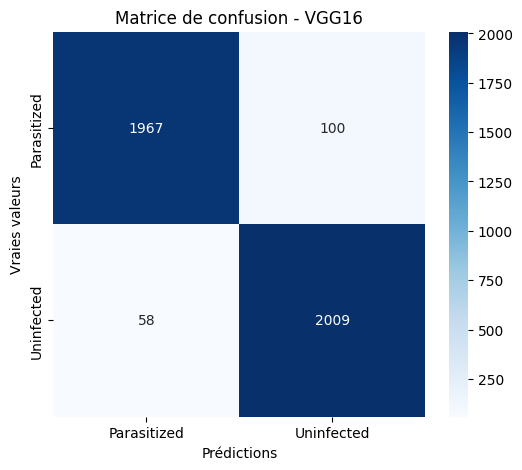

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions du modèle VGG16 sur le jeu de test
y_pred_vgg16 = (model_vgg16.predict(X_test_VGG16) > 0.5).astype("int32")

# Calcul de la matrice de confusion
cm_vgg16 = confusion_matrix(y_test_VGG16, y_pred_vgg16)

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(cm_vgg16, annot=True, fmt="d", cmap="Blues", xticklabels=["Parasitized", "Uninfected"], yticklabels=["Parasitized", "Uninfected"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion - VGG16")
plt.show()

ResNet50

130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


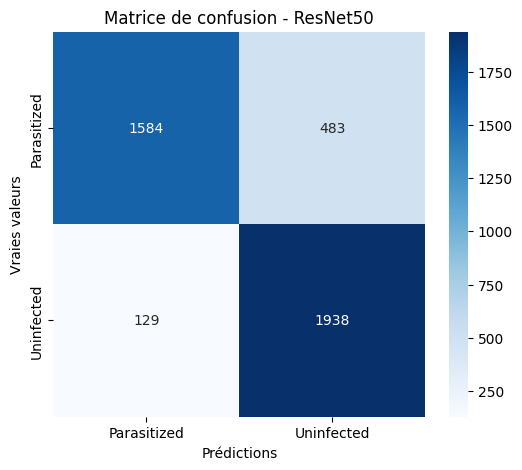

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions du modèle ResNet50 sur le jeu de test
y_pred_resnet50 = (model_resnet.predict(X_test_ResNet50) > 0.5).astype("int32")

# Calcul de la matrice de confusion
cm_resnet50 = confusion_matrix(y_test_ResNet50, y_pred_resnet50)

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(cm_resnet50, annot=True, fmt="d", cmap="Blues", xticklabels=["Parasitized", "Uninfected"], yticklabels=["Parasitized", "Uninfected"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion - ResNet50")
plt.show()

## 3) Calculer les métriques de performance

VGG16

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Fonction pour calculer les métriques
def compute_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Sensibilité = Recall
    sensitivity = recall

    # Spécificité = TN / (TN + FP)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    # Affichage des résultats
    print(f"\n🔹 {model_name} Metrics:")
    print(f"Accuracy     : {accuracy:.4f}")
    print(f"Precision    : {precision:.4f}")
    print(f"Recall       : {recall:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"Sensitivity  : {sensitivity:.4f}")
    print(f"Specificity  : {specificity:.4f}")

# Calcul des métriques pour VGG16
compute_metrics(y_test_VGG16, y_pred_vgg16, "VGG16")



🔹 VGG16 Metrics:
Accuracy     : 0.9618
Precision    : 0.9526
Recall       : 0.9719
F1 Score     : 0.9622
Sensitivity  : 0.9719
Specificity  : 0.9516


From_scratch

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Fonction pour calculer les métriques
def compute_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Sensibilité = Recall
    sensitivity = recall

    # Spécificité = TN / (TN + FP)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    # Affichage des résultats
    print(f"\n🔹 {model_name} Metrics:")
    print(f"Accuracy     : {accuracy:.4f}")
    print(f"Precision    : {precision:.4f}")
    print(f"Recall       : {recall:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"Sensitivity  : {sensitivity:.4f}")
    print(f"Specificity  : {specificity:.4f}")

# Calcul des métriques pour le modèle From Scratch
compute_metrics(y_test, y_pred_scratch, "From Scratch")


🔹 From Scratch Metrics:
Accuracy     : 0.9601
Precision    : 0.9490
Recall       : 0.9724
F1 Score     : 0.9606
Sensitivity  : 0.9724
Specificity  : 0.9478


ResNet50

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Fonction pour calculer les métriques
def compute_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Sensibilité = Recall
    sensitivity = recall

    # Spécificité = TN / (TN + FP)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    # Affichage des résultats
    print(f"\n🔹 {model_name} Metrics:")
    print(f"Accuracy     : {accuracy:.4f}")
    print(f"Precision    : {precision:.4f}")
    print(f"Recall       : {recall:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"Sensitivity  : {sensitivity:.4f}")
    print(f"Specificity  : {specificity:.4f}")

# Calcul des métriques pour ResNet50
compute_metrics(y_test_ResNet50, y_pred_resnet50, "ResNet50")


🔹 ResNet50 Metrics:
Accuracy     : 0.8520
Precision    : 0.8005
Recall       : 0.9376
F1 Score     : 0.8636
Sensitivity  : 0.9376
Specificity  : 0.7663
